# Problem 1: Too much choices given to Salad Stop's customers

#### Summary:
Salad Stop currently provides a wide variety of ingredients, dressings and toppings for their customers to choose from. As a result, this creates a problem whereby too much choices are given to their customers which is a potential turn-off to them. As a solution, we created a "Salad Suggester" which is essentially a linear optimizer which generates a salad which maximizes profits given a set of constraints/requirements set by Salad Stop's customer.

#### References:
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3493371
https://www.stern.nyu.edu/sites/default/files/assets/documents/Anisha%20Patel_Thesis_Honors%202014.pdf

## Descriptive Analytics

In this section, we will prove the relationship between choices and how it influences the purchase probability of a consumer. We will artificially generate a fake dataset which will be a simplified version of the dataset used in the "Too Little or Too Much Seller Assortment: The Effects on Buyers’ Purchase Probabilities in a Food Sharing Platform" research paper.

In [1]:
"""
Import Libraries
"""

import pandas as pd
import numpy as np
import math
import datetime
import seaborn as sb
import random
import os  
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot
SEED = 0
np.random.seed(SEED)
random.seed(SEED)

In [2]:
"""
Import fake dataset to create visualisations
"""
fake_customer_data = pd.read_csv('../data/faked_purchase_dataset.csv')
fake_customer_data = pd.DataFrame(fake_customer_data.groupby('Number of items on menu')['Purchase'].apply(lambda x: x[x == 1].count()))
fake_customer_data

,Purchase
Number of items on menu,
3,1
4,2
5,2
7,70
9,45
10,24
14,7
17,10
19,4


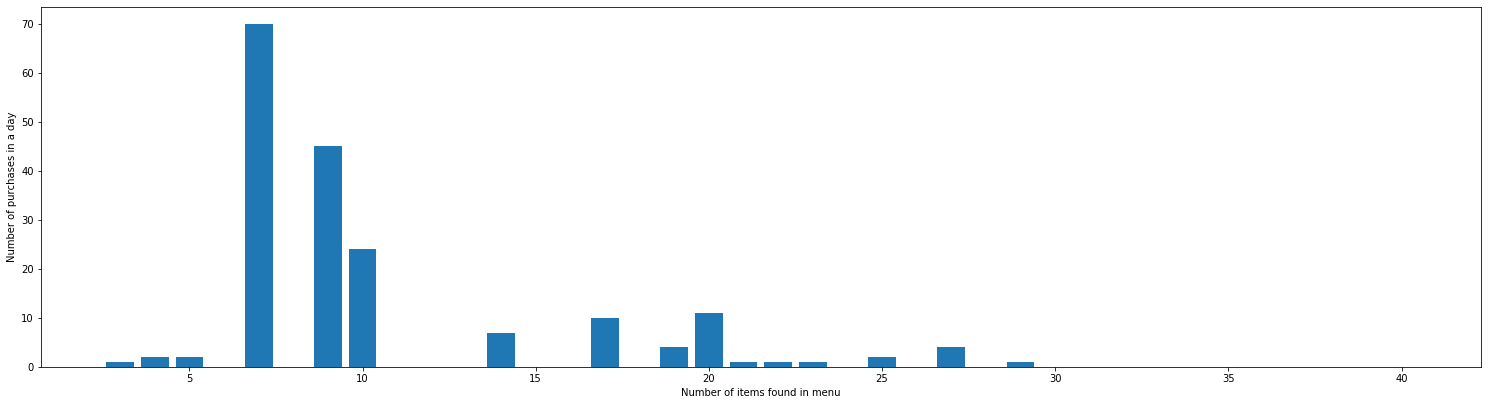

In [3]:
"""
From the following graph, we observe that restaurants with low number of items on their menu encounter
lower number of purchases. On the other end of the extreme, restaurants with high number of items of their
menu encounter also encounter low number of purchases. The optimal number of items on menu that receives
highest number of purchases seem to be 7 items.
"""

"""
Plotly Version
"""

# fig = px.bar(fake_customer_data, height=300, labels={'value':'Number of purchases in a day'})
# fig.show()

"""
Matplotlib Version
"""

fig = plt.figure()
fig.set_size_inches(20, 5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of purchases in a day')
ax.set_xlabel('Number of items found in menu')
langs = fake_customer_data.index
students = fake_customer_data["Purchase"]
ax.bar(langs,students)
plt.show()

## Predictive Analytics

In this section, We will build a model based off our artificially generated dataset to be able to predict the purchase probability based on number of options given to consumers.

In [4]:
"""
Import Libaries
"""

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
# import graphviz

In [5]:
"""
Import dataset and prepare training/testing data
"""

customer_data = pd.read_csv('../data/faked_purchase_dataset.csv')
y = pd.DataFrame(customer_data["Purchase"])
x = pd.DataFrame(customer_data[["Number of items on menu"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=SEED, test_size = 0.1)

In [6]:
"""
Train and fit decision tree (CART)
"""

dectreex1 = DecisionTreeClassifier(max_depth = 3)
dectreex1.fit(x_train, y_train)

# treedot = export_graphviz(dectreex1, feature_names = x_train.columns, class_names = True, out_file = None, filled = True, rounded = True, special_characters = True)      
# graphviz.Source(treedot)

DecisionTreeClassifier(max_depth=3)

In [7]:
"""
Evaluate performance of Decision Tree using classification accuracy
"""

y_train_pred = dectreex1.predict(x_train)
y_test_pred = dectreex1.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreex1.score(x_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreex1.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9477777777777778

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.94



In [8]:
def was_there_a_purchase(value):
    if value == 1: return "will"
    else: return "will not"

NUMBER_OF_ITEMS_ON_MENU = 1
salad_stop_prediction_arr = np.array([[NUMBER_OF_ITEMS_ON_MENU]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer {} have made a purchase at a restautant with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), NUMBER_OF_ITEMS_ON_MENU))

NUMBER_OF_ITEMS_ON_MENU = 8
salad_stop_prediction_arr = np.array([[NUMBER_OF_ITEMS_ON_MENU]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer {} have made a purchase at a restautant with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), NUMBER_OF_ITEMS_ON_MENU))

NUMBER_OF_ITEMS_ON_MENU = 30
salad_stop_prediction_arr = np.array([[NUMBER_OF_ITEMS_ON_MENU]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer {} have made a purchase at a restautant with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), NUMBER_OF_ITEMS_ON_MENU))

SALAD_STOP = 38
salad_stop_prediction_arr = np.array([[SALAD_STOP]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer {} have made a purchase at a Salad Stop with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), SALAD_STOP))

Particular customer will not have made a purchase at a restautant with 1 items!
Particular customer will have made a purchase at a restautant with 8 items!
Particular customer will not have made a purchase at a restautant with 30 items!
Particular customer will not have made a purchase at a Salad Stop with 38 items!


## Prescriptive Analytics

In this section, we will propose our solution to help Salad Stop's customer to create a salad based on their
preference without them having to make any selections while still allowing Salad Stop to profit. Our solution is 
a linear optimization model which aims to suggest a salad based on a customer's preferences or constraints while
allowing Salad Stop as a business to maximize their profits

In [9]:
"""
Import Libaries
"""

from rsome import ro
from rsome import grb_solver as grb

In [10]:
"""
Data Preparation: All information obtained regarding Salad Stop was directly scrapped from their 
website https://www.saladstop.com.sg/
"""

data1 = pd.read_csv('../data/menu.csv')
header1 = data1.columns

print("Shape of dataset: {} rows, {} columns".format(data1.shape[0], data1.shape[1]))

Shape of dataset: 88 rows, 25 columns


In [11]:
"""
We will be artificially setting the total quantity available of each ingredient and dynamically change it
after every order is generated later on
"""

ORIGINAL_QTY = 5

data1['Total'] = ORIGINAL_QTY
print("Total number of ingredients is {} and should be {}".format(sum(data1['Total'][:-1]), (data1.shape[0]-1) * ORIGINAL_QTY))

Total number of ingredients is 435 and should be 435


In [12]:
"""
Final dataset we will use
"""

data1.tail()

,Ingredient,Ingredient_type,Price,Serving_size,COGS,"per (g, pcs, unit)",COGS_per_serving,Adjusted_COGS_per_serving (if needed),Calories,Carbohydrates,...,Carbon_footprint,Vegan,Vegetarian,Gluten,Dairy,Nuts,Spicy,Sources,Unnamed: 24,Total
83,Salt & Pepper,Dressing (Western),NaN,6,11.925,250.0,0.29,NaN,8,2.0,...,0.0,0,1,0,0,0,0,https://www.fairprice.com.sg/product/cj-natura...,https://www.fairprice.com.sg/product/fairprice...,5
84,Smoked Pimento,Dressing (Western),NaN,30,8.900,250.0,1.07,NaN,39,1.9,...,0.0,0,1,0,1,0,0,https://goodfoodpeople.sg/product/smoked-pimen...,NaN,5
85,Smoky Ranch,Dressing (Western),NaN,30,6.950,245.0,0.85,NaN,66,1.6,...,0.0,0,1,0,1,0,0,https://www.fairprice.com.sg/product/atkins-po...,NaN,5
86,Tabbasco Sauce,Dressing (Western),NaN,5,2.950,60.0,0.25,NaN,3,0.0,...,0.0,0,1,0,0,0,1,https://www.fairprice.com.sg/product/tabasco-p...,NaN,5
87,Placeholder,Placeholder,NaN,0,0.000,0.0,0.00,NaN,0,0.0,...,0.0,0,0,0,0,0,0,Placeholder,NaN,5


In [13]:
"""
Generate salad based on user's input:

Details on Salad Stop:
Link: https://www.saladstop.com.sg/cyo/
1. Choose either premium base or standard base (standard base includes wrap and grain bowls)
2. Choose 2 dressing
3. Choose 7 standard toppings (even if you chose premium base)
4. Can add as many premium toppings as you want but will have additional charges
"""

def generate_salad(user_input, data_input, ingredient_qty):
    
    try:
    
        '''
        Construct Optimizer.
        '''
        model = ro.Model('Salad selector model')

        '''
        Other variables to be used later:
        n refers to the total number of ingredients offered by salad stop
        '''
        n = len(data_input["ingredient"])

        '''
        Initialize Decision Variables
        x is the selection of an ingredient in the salad (binary variables)
        s is the standard base selection (binary variable)
        t is the premium base selection (binary variable)
        '''
        x = model.dvar(n, vtype='B')
        s = model.dvar((1,), vtype='B')
        t = model.dvar((1,), vtype='B')

        '''
        Create Objective Function: To minimize cost paid by the customer while meeting user input constraints.
        
        This objective function is preferred because the problem stems from the customer side rather than the business side.
        Whereby customers are confused at what to order due to the presence of too many choices. If we are optimizing the choices
        customers should make, then we should minimize the cost of the salad paid by the customer as the customer would want to
        pay as little as possible for their salad.
        '''
        model.min((9.9*s + 11.9*t + sum(x[i]*data_input["price"][i] for i in range(n) if data_input["ingredient_type"][i] in ['Premium Topping'])))

        '''
        Alternative Objective Function: To maximize profit earned by the business while meeting user input constraints.
        '''
        # model.max((9.9*s + 11.9*t + sum(x[i]*data_input["price"][i] for i in range(n) if data_input["ingredient_type"][i] in ['Premium Topping'])) - (sum(x[i]*data_input["cost"][i] for i in range(n))))
        
        '''
        Constraints 1: Optimizer will not select ingredient with 0 quantity left 
        '''
        model.st(sum(x[i] for i in range(n) if ingredient_qty[i] == 0) == 0)

        '''
        Constraints 2: Depending on the base selected, ingredients should be of the same category as the type of base selected
        '''
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Standard Base', 'Wrap', 'Grain Bowl']) == s)
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Premium Base']) == t)

        '''
        Constraints 3: Ensure that either standard base is selected or premium base selected. Cannot be neither selected or both selected
        '''
        model.st(0 <= s <= 1)
        model.st(0 <= t <= 1)
        model.st(s + t == 1)

        '''
        Constraints 4: Ensure that only exactly 7 toppings unless the user wants more will be chosen
        '''
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Standard Topping']) == 7)

        '''
        Constraints 5: Ensure that only exactly 2 dressings unless the user wants more will be chosen
        '''
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Dressing (Asian)', 'Dressing (Western)']) == 2)

        '''
        Constraints 6: Ensure that the selection of ingredients meets nutrition requirements of user
        '''
        nutrition_list = [data_input["calories"], data_input["carbs"], data_input["protein"], data_input["fat"], data_input["sugar"]]
        for j in range(len(nutrition_list)):
            nutri =  nutrition_list[j]
            model.st(user_input["min_nutrition"][j] <= sum(x[i]*nutri[i] for i in range(n)))
            model.st(sum(x[i]*nutri[i] for i in range(n)) <= user_input["max_nutrition"][j])

        '''
        Constraints 7: Ensure that the dietary needs of user is met
        '''
        reqs = [data_input["vegan"], data_input["vegetarian"], data_input["gluten"], data_input["dairy"], data_input["nuts"], data_input["spicy"]]
        for k in range(len(user_input["dietary_req"])):
            req_type = reqs[k]
            if user_input["dietary_req"][k] == 0:
                model.st(sum(x[i] for i in range(n) if req_type[i] == 1) == 0 )

        '''
        Constraints 8: Ensure that the number of premium toppings meet user requirements
        '''
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Premium Topping']) >= user_input["max_num_of_premium_toppings"])

        '''
        Constraints 9: Ensure that the total cost of the salad is within the user's budget
        '''
        model.st((9.9*s + 11.9*t + sum(x[i]*data_input["price"][i] for i in range(n) if data_input["ingredient_type"][i] in ['Premium Topping'])) <= user_input["budget"])

        '''
        Constraints 10: Ensure that the total cost of the salad is within the user's budget
        '''
        model.st(x >= 0)
        
        '''
        Solve Model and generate results
        '''
        model.solve(grb)
        
        if int(s.get()[0]) == 1:
            base = 9.9
        else:
            base = 11.9

        return x.get(), model.get(), base
    
    except:

        return [], 0, 0

In [14]:
"""
Set user requirements
"""

user_input = {
    "min_nutrition": np.array([450, 30, 20, 0, 0]), # calories, carbs, protein, fat, sugar
    "max_nutrition": np.array([500, 500, 30, 10, 10]),
    "budget" : 17,
    "max_num_of_premium_toppings": 3,
    "dietary_req": [1,1,1,1,1,1] # vegan, vegetarian, gluten, dairy, nuts, spicy
}

In [15]:
"""
Set dataset values
"""

data = data1.values

ingredient, ingredient_type, price, cost, calories, carbs, protein, fat, sugar =\
data[:,0], data[:,1], data[:,2], data[:,6], data[:,8], data[:,9], data[:,10], data[:,11], data[:,12]

vegan, vegetarian, gluten, dairy, nuts, spicy =\
data[:,-9], data[:,-8], data[:,-7], data[:,-6], data[:,-5], data[:,-4]

data_input = {
    "ingredient": ingredient,
    "ingredient_type": ingredient_type,
    "price": price,
    "cost": cost,
    "calories": calories,
    "carbs": carbs,
    "protein": protein,
    "fat": fat,
    "sugar": sugar,
    "vegan": vegan,
    "vegetarian": vegetarian,
    "gluten": gluten,
    "dairy": dairy,
    "nuts": nuts,
    "spicy": spicy,
}

In [16]:
"""
Test our optimizer
"""

total = data[:,-1]
total[-1] = 0


for j in range(1):
    
    response, cost, base = generate_salad(user_input, data_input, total)
    
    if base == 0:
        print("Cannot make a salad... Impossible set of constraints")
    
    else:
        print("\n============== RECEIPT ==============\n")
        print("Purchase: \n")
        total_cost = 0
        total_cost += base
        for i in range(len(response)):
            if response[i] > 0:
                index = np.where(data_input["ingredient"] == ingredient[i])[0][0]
                
                print("{}, {}".format(ingredient[i], data_input["ingredient_type"][index]))
                
                if data_input["ingredient_type"][index] == "Premium Topping":
                    total_cost += data_input["price"][index]
                
                if total[i] > 0:
                    total[i] -= 1

        print("\n")
        print("Customer #{}, base price: {}".format(j, base))
        print("Cost of salad: ${}".format(round(total_cost,2)))
        print("Amount of ingredients left: {}".format(sum(total)))
        print("\n=====================================\n")

Restricted license - for non-production use only - expires 2023-10-25
Being solved by Gurobi...
Solution status: 2
Running time: 0.0085s

============== RECEIPT ==============

Purchase: 

Quinoa, Grain Bowl
Pea Sprouts, Standard Topping
Pomelo, Standard Topping
Soba Noodles, Standard Topping
Black Beans, Standard Topping
Broccoli, Standard Topping
French Beans, Standard Topping
Beetroot, Standard Topping
Thai Asparagus, Premium Topping
Veggie Patty, Premium Topping
Grilled Tofu, Premium Topping
Salt & Pepper, Dressing (Western)
Tabbasco Sauce, Dressing (Western)


Customer #0, base price: 9.9
Cost of salad: $14.4
Amount of ingredients left: 422


